# Plot grafs and base map
Import functions and load data

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
FACA = pd.read_csv('/home/simon/Desktop/Bachelor_project/data/cvs_files/FAC_A.csv', index_col=0)
FACA.index = pd.to_datetime(FACA.index)
FACC = pd.read_csv('/home/simon/Desktop/Bachelor_project/data/cvs_files/FAC_C.csv', index_col=0)
FACC.index = pd.to_datetime(FACC.index)
DNS = pd.read_csv('/home/simon/Desktop/Bachelor_project/data/cvs_files/DNS.csv', index_col=0)
DNS.index = pd.to_datetime(DNS.index)
Half_orbit = pd.read_csv('/home/simon/Desktop/Bachelor_project/data/cvs_files/half_orbit_means.csv', index_col=0)
Half_orbit.index = pd.to_datetime(Half_orbit.index)

In [11]:
FACA.FAC.name= 'FAC_A'
FACC.FAC.name= 'FAC_C'

### Plot the the data

<IPython.core.display.Javascript object>


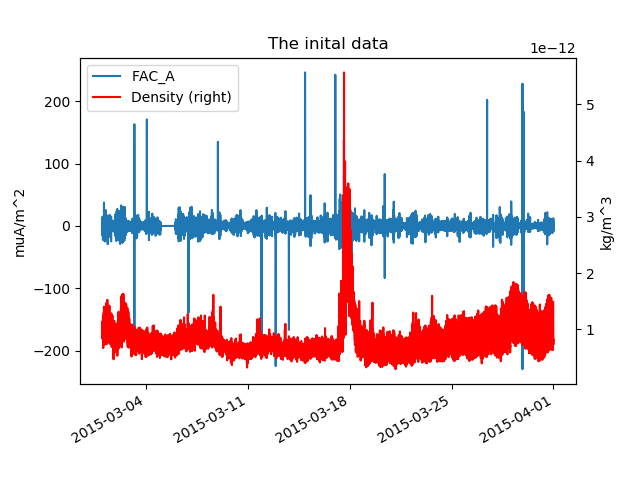

In [12]:
plt.figure()

p1 = FACA.FAC.plot(legend=True)
p2 = DNS.Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('The inital data')
plt.show()

<IPython.core.display.Javascript object>


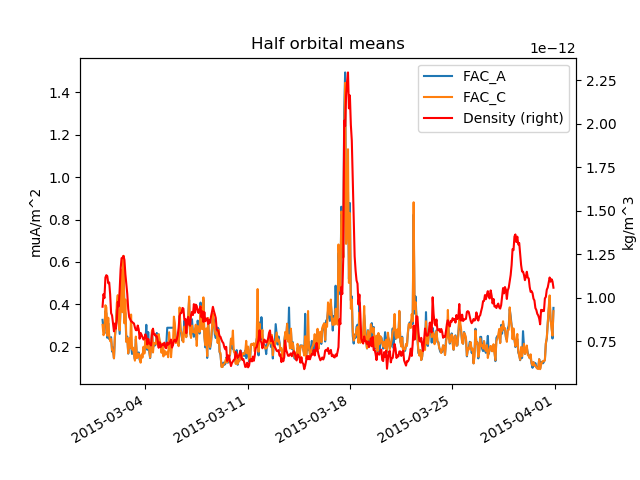

In [15]:
plt.figure()

p1 = Half_orbit[Half_orbit.Hemisphere==1].FAC_A.plot(legend=True)
Half_orbit[Half_orbit.Hemisphere==1].FAC_C.plot(legend=True)
p2 = Half_orbit[Half_orbit.Hemisphere==1].Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('Half orbital means')
plt.show()

### Basemap plot of one orbit

In [82]:
orbit_values = FACA[(FACA.Orbit_nr>1) & (FACA.Orbit_nr<5) & (FACA.Hemisphere==1)]

<IPython.core.display.Javascript object>


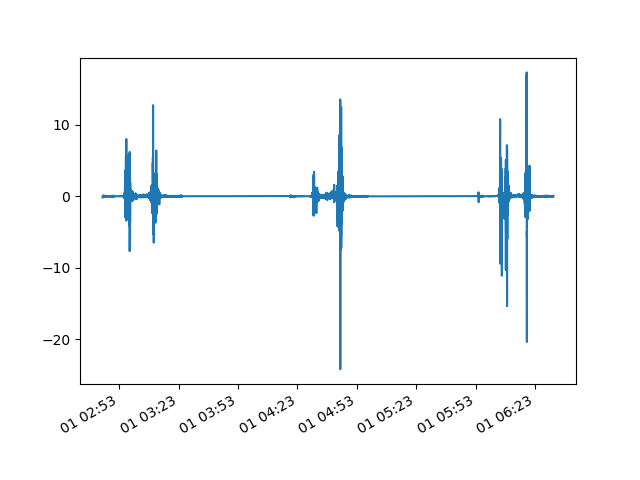

In [83]:
plt.figure()

orbit_values.FAC.plot()
plt.show()

<IPython.core.display.Javascript object>


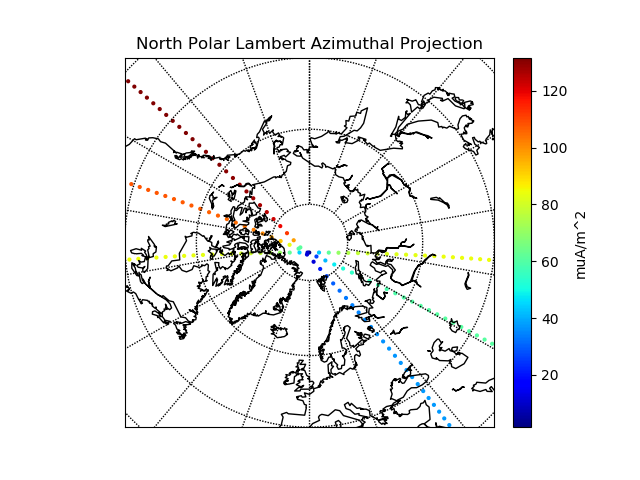

/home/simon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/simon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [86]:
rate = 40
plt.figure()
# setup north polar lambert azimuthal basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0.
m = Basemap(projection='nplaea',boundinglat=40,lon_0=0,resolution='c')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
# draw tissot's indicatrix to show distortion.

area = 4*np.ones(len(orbit_values.Longitude.values[::rate]))
colors = abs(orbit_values.Longitude.values[::rate])
x,y = m(orbit_values.Longitude.values[::rate], orbit_values.Latitude.values[::rate])

cs= m.scatter(x, y, s=area, c=colors,cmap ='jet')

# add colorbar.
cbar = m.colorbar(cs,location='right',pad="5%")
cbar.set_label('muA/m^2')

plt.title("North Polar Lambert Azimuthal Projection")
plt.show()

In [43]:
m.scatter?

In [ ]:
df_allign.iloc[:,0:4].corr()